In [34]:
import requests
import shutil
import pandas as pd
from datetime import datetime, timedelta
from dateutil import relativedelta

# enter start/end dates here, convert to datetime object, get the interval between two dates
start_date = datetime.strptime('2018-2', '%Y-%m')  # the latter arg defines the format of the given string
end_date = datetime.strptime('2021-2', '%Y-%m')  #Usually last month available, since JMA updates monthly data rarely
diff = relativedelta.relativedelta(end_date, start_date)

# need to know how many days we need to loop over
months_count = diff.months + diff.years * 12 + 1

# loop over days and download file
for i in range(months_count):
    #date_str = (start_date + timedelta(i)).strftime('%y%m%d')  # convert our datetime obj into the desired string format
    year_str = (start_date + relativedelta.relativedelta(months=+i)).strftime('%y')  # convert our datetime obj into the desired string format
    yearmonth_str = (start_date + relativedelta.relativedelta(months=+i)).strftime('%y%m')  # convert our datetime obj into the desired string format
    #https://www.data.jma.go.jp/gmd/kaiyou/data/db/wave/chart/wavepoint/txt/2021/gmdf2101.csv
    r = requests.get(f'https://www.data.jma.go.jp/gmd/kaiyou/data/db/wave/chart/wavepoint/txt/{year_str}/gmdf{yearmonth_str}.csv', stream=True)
    if r.status_code == 200:
        with open(f'gmdf{yearmonth_str}.csv', 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

In [32]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil import relativedelta

# enter start/end dates here, convert to datetime object, get the interval between two dates
start_date = datetime.strptime('2018-2', '%Y-%m')  # the latter arg defines the format of the given string
end_date = datetime.strptime('2021-2', '%Y-%m')
diff = relativedelta.relativedelta(end_date, start_date)

# need to know how many days we need to loop over
months_count = diff.months + diff.years * 12 + 1
#months_count = (end_date - start_date).months + 1
print('Difference between dates in months:')
print(months_count)

Difference between dates in months:
37


In [33]:
chiten = "E" #replace with representative point you need
with open('totalwave.csv','wb') as file:
    # loop over months
    for i in range(months_count):
        date_str = (start_date + relativedelta.relativedelta(months=+i)).strftime('%y%m')  # convert our datetime obj into the desired string format
        s1 = pd.read_csv(f'gmdf{date_str}.csv', delimiter=',', encoding='shift_jis')
        s1 = s1[s1['地点'] == chiten]
        s1['地点'] = date_str
        s1.to_csv(file, header=False, index=False)
        print(date_str)

1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2101
2102


In [68]:
df1 = pd.read_csv(f'totalwave.csv')
df1.columns=['YearMonth', 'Day', 'Hour', 'Period', 'Height', 'Direction']
df1['Date'] = df1['YearMonth'].astype(str) + '-' + df1['Day'].astype(str) + '-' + df1['Hour'].astype(str)
df1['Date'] = df1['Date'].apply(pd.to_datetime, format='%y%m-%d-%H')
df1.drop(['YearMonth', 'Day', 'Hour'], axis=1, inplace=True)
df1.replace({'Direction' : { 1 : 'N', 2 : 'NNE', 3 : 'NE', 4 : 'ENE', 5 : 'E', 6 : 'ESE', 7 : 'SE', 8 : 'SSE', 9 : 'S', 10 : 'SSW', 11 : 'SW', 12 : 'WSW', 13: 'W', 14: 'WNW', 15 : 'NW', 16 : 'NNW'}}, inplace=True)
print(df1)

      Period  Height Direction                Date
0          8     2.9       ENE 2018-02-01 12:00:00
1          9     3.9       ENE 2018-02-02 00:00:00
2          9     2.8       ENE 2018-02-02 12:00:00
3          9     2.7       ENE 2018-02-03 00:00:00
4         10     1.8       ENE 2018-02-03 12:00:00
...      ...     ...       ...                 ...
2242      11     2.1       ENE 2021-02-26 12:00:00
2243       8     2.5       NNE 2021-02-27 00:00:00
2244       9     2.5        NE 2021-02-27 12:00:00
2245       9     1.5       ENE 2021-02-28 00:00:00
2246       9     1.4         E 2021-02-28 12:00:00

[2247 rows x 4 columns]


In [119]:
df2 = pd.read_csv(f'results2_cleaned.txt', delim_whitespace=True) # replace
df2.columns=['Date', 'Direction', 'Period', 'Height']
df2['Date'] = df2['Date'].apply(pd.to_datetime, format='%y%m%d%H')
print(df2)

                   Date Direction  Period  Height
0   2021-03-01 12:00:00       SSE       9     1.8
1   2021-03-02 00:00:00         S       8     3.3
2   2021-03-02 12:00:00         S       9     3.3
3   2021-03-03 00:00:00       NNE       8     3.5
4   2021-03-03 12:00:00       ENE       8     2.9
..                  ...       ...     ...     ...
400 2021-09-17 12:00:00         E       9     2.0
401 2021-09-18 00:00:00       SSE       7     2.7
402 2021-09-18 12:00:00         S       8     3.2
403 2021-09-19 00:00:00       ENE       7     2.9
404 2021-09-19 12:00:00        NE       7     2.7

[405 rows x 4 columns]


In [120]:
df = pd.concat([df1, df2]).reset_index(drop=True)
df.to_csv('fullwavedata.csv')
print(df)

      Period  Height Direction                Date
0          8     2.9       ENE 2018-02-01 12:00:00
1          9     3.9       ENE 2018-02-02 00:00:00
2          9     2.8       ENE 2018-02-02 12:00:00
3          9     2.7       ENE 2018-02-03 00:00:00
4         10     1.8       ENE 2018-02-03 12:00:00
...      ...     ...       ...                 ...
2647       9     2.0         E 2021-09-17 12:00:00
2648       7     2.7       SSE 2021-09-18 00:00:00
2649       8     3.2         S 2021-09-18 12:00:00
2650       7     2.9       ENE 2021-09-19 00:00:00
2651       7     2.7        NE 2021-09-19 12:00:00

[2652 rows x 4 columns]


                     Height
Date                       
2018-02-01 12:00:00     2.9
2018-02-02 00:00:00     3.9
2018-02-02 12:00:00     2.8
2018-02-03 00:00:00     2.7
2018-02-03 12:00:00     1.8
...                     ...
2021-09-17 12:00:00     2.0
2021-09-18 00:00:00     2.7
2021-09-18 12:00:00     3.2
2021-09-19 00:00:00     2.9
2021-09-19 12:00:00     2.7

[2652 rows x 1 columns]


<AxesSubplot:xlabel='Time', ylabel='$\\eta$ [m]'>

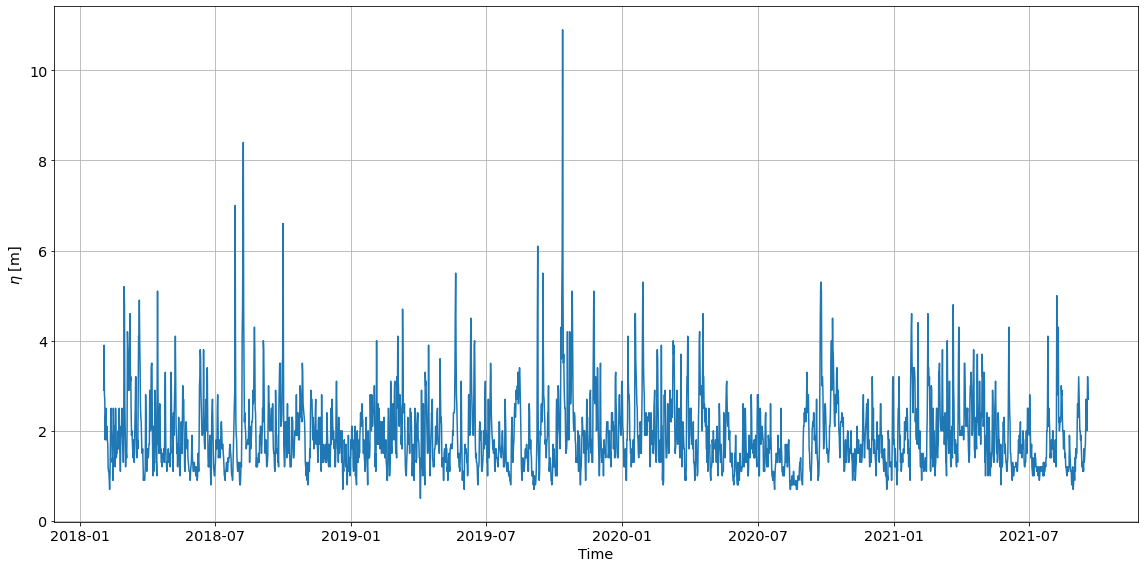

In [121]:
from mhkit import wave
eta = df[['Height']].copy().set_index(df['Date'], drop=True)
print(eta)
wave.graphics.plot_elevation_timeseries(eta, ax=None)

In [122]:
eta = eta.squeeze()
eta.head()

Date
2018-02-01 12:00:00    2.9
2018-02-02 00:00:00    3.9
2018-02-02 12:00:00    2.8
2018-02-03 00:00:00    2.7
2018-02-03 12:00:00    1.8
Name: Height, dtype: float64

In [116]:
eta.dtypes

dtype('float64')

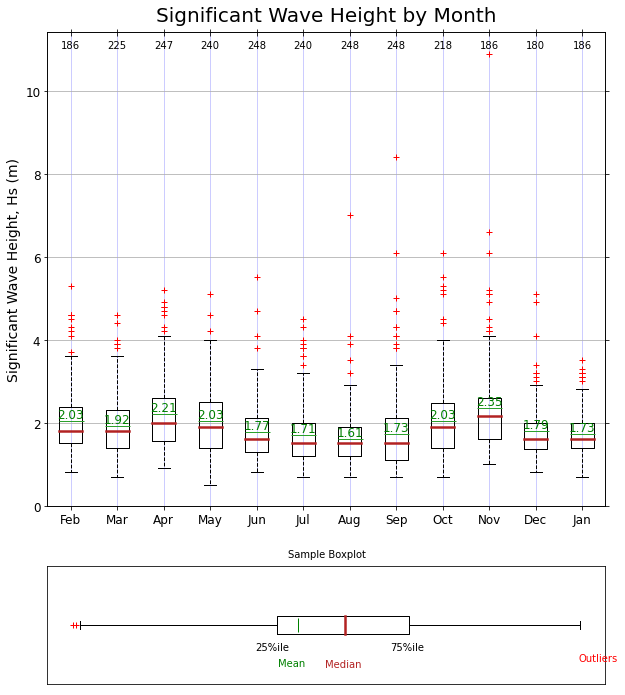

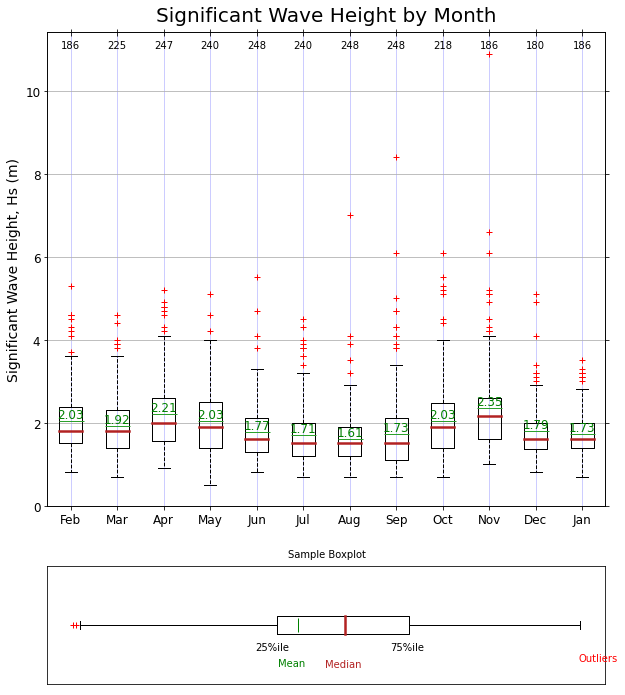

In [132]:
wave.graphics.plot_boxplot(eta)

In [124]:
wavedata1 = df[['Direction', 'Height']].copy()# .set_index(df['Date'], drop=True)
wavedata1.replace({'Direction' : {'N' : 0, 'NNE' : 22.5, 'NE' : 45, 'ENE' : 67.5, 'E': 90, 'ESE': 112.5, 'SE' : 135, 'SSE' : 157.5, 'S' : 180, 'SSW' : 202.5, 'SW' : 225, 'WSW' : 247.5, 'W' : 270, 'WNW' : 292.5, 'NW' : 315, 'NNW' : 337.5}}, inplace=True)
print(wavedata1)

      Direction  Height
0          67.5     2.9
1          67.5     3.9
2          67.5     2.8
3          67.5     2.7
4          67.5     1.8
...         ...     ...
2647       90.0     2.0
2648      157.5     2.7
2649      180.0     3.2
2650       67.5     2.9
2651       45.0     2.7

[2652 rows x 2 columns]


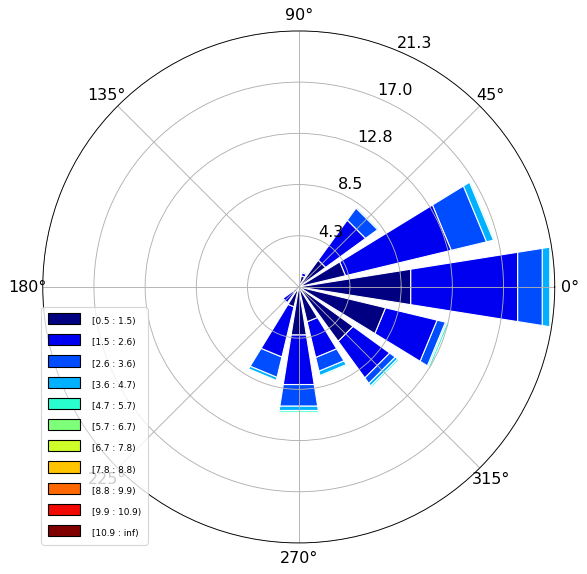

In [110]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
ax = WindroseAxes.from_ax()
ax.bar(wavedata1['Direction'], wavedata1['Height'], normed=True, bins=11, opening=0.8, edgecolor='white')
ax.set_legend()

In [127]:
df.dtypes

Period                int64
Height              float64
Direction            object
Date         datetime64[ns]
dtype: object

In [126]:
df.Period.astype(float)

0        8.0
1        9.0
2        9.0
3        9.0
4       10.0
        ... 
2647     9.0
2648     7.0
2649     8.0
2650     7.0
2651     7.0
Name: Period, Length: 2652, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Period'>

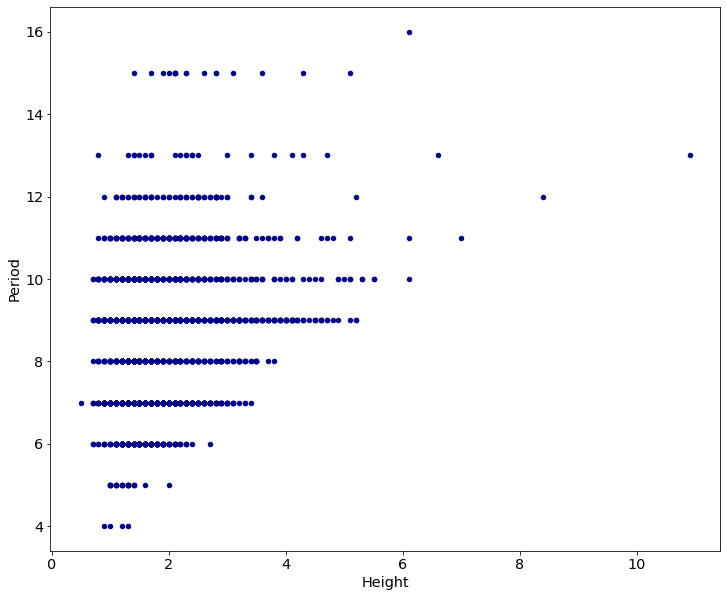

In [134]:
wavedata2 = df[['Period', 'Height']].copy()
wavedata2.squeeze()
df.plot.scatter(x='Height', y='Period', c='DarkBlue', figsize=(12, 10))